# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the number of ones in the input dataset. First, we'll start by importing the math library to help make computation easier.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Reading The data

In [2]:
data = pd.read_csv('data.csv')
data.head()

,x1,x2,x3,x4,y
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,1,0,1
3,0,0,1,1,2
4,0,1,0,0,1


## Separate Data Set from Labels

In [3]:
xs = np.array(data[['x1', 'x2', 'x3', 'x4']])
ys = np.array(data['y'])

## Split Data Set in to Training Data and Test Data
Here we randomly sample the 70% of the data to be used for the training and the other 30% would be used to verify our training accuracy

In [4]:
indices = np.arange(xs.shape[0])

training_indices = np.random.choice(indices, size=int(np.floor(0.7 * len(indices))), replace=False);
test_indices = np.array([x for x in indices if x not in training_indices])

training_data = xs[training_indices];
training_labels = ys[training_indices];

test_data = xs[test_indices];
test_labels = ys[test_indices];

print('Train data:', training_data[0])
print('Train label: ', training_labels[0])

Train data: [1 0 0 1]
Train label:  2


## Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Output (prediction) formula

$$\hat{y} = (w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4)$$

- Error function

$$E = (\hat{y} - y)^2$$

- Gradient function

$$E^\prime = 2(\hat{y} - y)$$

- Mean squared Error function

$$MSE = \frac{1}{2m}\sum{(\hat{y} - y)^2}$$


- Deferential of Mean squared Error function

$$MSE^\prime = \frac{1}{m}\sum{(\hat{y} - y)}$$

- The function that updates the weights

$$ w_i \longrightarrow w_i - \frac{\alpha}{m}\sum{(\hat{y} - y)}x_i$$


In [5]:
# Output (prediction) formula
def output_formula(features, weights):
    return np.dot(features, weights)

# Error formula
def error_formula(y_hat, y):
    return (y_hat - y) ** 2

def error_formula_prime(y_hat, y):
    return 2 * (y_hat - y)

def MSE(y_hats, ys):
    return np.mean((y_hats - ys) ** 2)

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs.

- Prediction fuction 

$$\hat{y} = (w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4)$$

- Compute the gradinet 

$$\delta = \frac{1}{m}\sum{(\hat{y} - y)}$$

- Update the weights

$$ w_i \longrightarrow w_i - \alpha * \delta * x_i$$

In [63]:
np.random.seed(44)

def train(xs, ys, weights, epochs, learnrate):
    
    errors = []
    n_records, n_features = xs.shape
    
    for e in range(epochs):
        for x, y in zip(xs, ys):
            # Feed Forward function
            y_hat = output_formula(x, weights)
            # Compute gradient
            d_error = error_formula_prime(y_hat, y)
            # Update weights
            weights = weights - learnrate * d_error * x
        
        
        # Printing out the loss error on the training set
        y_hats = output_formula(xs, weights)
        loss = MSE(y_hats, ys)
        errors.append(loss)
        
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            print("Train loss: ", loss)
    
    # Plotting the error
    plt.plot(errors)
    plt.show()
            
    return weights

## Initialize Random Weights

In [22]:
# Intialize weights
weights = np.random.normal(size=4)
print('Weights', weights)

Weights [-0.0523222   0.55547164 -0.96340369 -0.18032147]


## Time to train the algorithm!
The training algorithim uses a learning rate ($\alpha$) of 0.1 and a total of 100 iterations (epochs) to train the model over the training data set.


========== Epoch 0 ==========
Train loss:  0.491555877408

========== Epoch 4 ==========
Train loss:  0.00247291907219

========== Epoch 8 ==========
Train loss:  1.36849245574e-05

========== Epoch 12 ==========
Train loss:  8.98905989905e-08

========== Epoch 16 ==========
Train loss:  8.41567295379e-10

========== Epoch 20 ==========
Train loss:  1.12395688996e-11

========== Epoch 24 ==========
Train loss:  1.77305998342e-13

========== Epoch 28 ==========
Train loss:  2.9080016315e-15

========== Epoch 32 ==========
Train loss:  4.75957473432e-17

========== Epoch 36 ==========
Train loss:  7.71674754111e-19


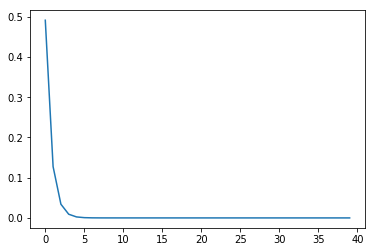

In [64]:
# Reintialize weights
weights = np.random.normal(size=4)
# Perform training
weights = train(training_data, training_labels, weights, 40, 0.1)

## Weights After Training

In [65]:
print('Weights:', weights)

Weights: [ 1.  1.  1.  1.]


## Training Accuracy

In [52]:
pred = output_formula(test_data, weights)
accuracy = np.mean(np.abs(pred - test_labels.astype(np.float32)) < 0.00001)
print('Accuracy: %d%%' % (accuracy * 100));

Accuracy: 100%
